#**Load MNIST Image Data and Fit Model**

In [1]:
# SHAP can break with the latest version of tensorflow - this makes TF behave like version 1.0.
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
non-resource variables are not supported in the long term
11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - ETA: 0s - loss: 0.2351 - acc: 0.9306

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 12s 200us/sample - loss: 0.2351 - acc: 0.9306 - val_loss: 0.0559 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0833 - acc: 0.9751 - val_loss: 0.0376 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0622 - acc: 0.9813 - val_loss: 0.0302 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0505 - acc: 0.9844 - val_loss: 0.0292 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0309 - val_acc: 0.9895
Epoch 6/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0276 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0324 - acc: 0.9895 - val_loss: 0.0289 - val_acc: 0.9911
Epoch 8/12
60000/60000 [============

#**Load SHAP and Explain Predictions**

In [2]:
!pip install shap
import shap
import numpy as np

# We will randomly sample 100 images from the training data.
# This image set will be used as the basis for constructing counter-examples (permutations/combinations) for each feature-value, which marginal contributions will be averaged over for each feature.
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)

shap_values = e.shap_values(x_test[1:5])

     |████████████████████████████████| 564 kB 13.8 MB/s 


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


Here, we produce plots of the SHAP values associated with pixels for five text images, for each of the different outcome class labels in the softmax. 

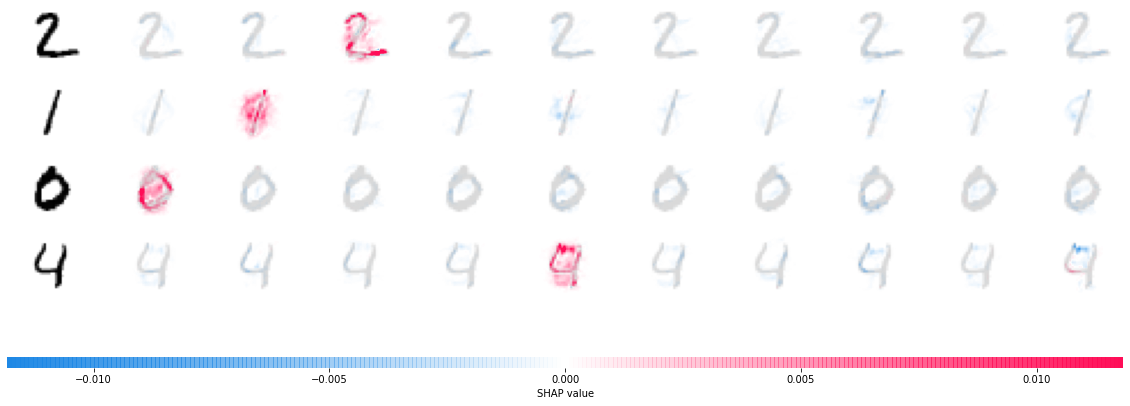

In [3]:
shap.image_plot(shap_values, -x_test[1:5])